# Интерполационна формула на Нютон. Някои практически въпроси, свързани с интерполацията.

### Задача 1

Да се напише функция _divided_difference(nodes, values)_, където _nodes_ е списък с точки от реалната права, а _values_ -- списък с реални стойности. Функцията да изчислява разделената разлика на функция със стойности _values_ в точките _nodes_.

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy as sp

In [17]:

# slicing arr[1:4] indexes from 1 to 3
# slicing arr[:4] from start to 3
# slicing arr[2:] from 2 to end
# len(arr)
# arr1 = np.linspace(from, to(included), number_of_elements)
# arr2 = np.arange(from, to(excluded), jump)
# define a symbolic variable
# x = sp.Symbol('x')
# x**2 + 10*x
# expr = x**2 + 10*x
# expr.subs(x, 4.5)
# if we want ot compute the value of expr for each element of a array
# x_axis = np.linspace(-1,1,1000)
# we trasnform expr to function:
# f = sp.lambdify(x, expr)
# f(x_axis)

In [59]:
def devided_difference(nodes,values):
    length = len(nodes)
    if length == 1:
        return values[0]
    return (devided_difference(nodes[1:],values[1:]) - devided_difference(nodes[:length-1],values[:length-1]))/(nodes[length-1] - nodes[0])
print(devided_difference([0,1,4],[2,5,48])) # passed

2.8333333333333335


### Задача 2
Да се напише функция *newton_poly(nodes, values, x)*, която връща интерполационния полином на Лагранж, с възли _nodes_ и съответни стойности _values_.

In [69]:
def newton_poly(nodes,values,x):
    length = len(nodes)
    result = devided_difference(nodes[0:1],values[0:1])
    for i in range(1,length):
        curr = 1
        for j in range(0,i):
            curr *= (x-nodes[j])
        result += curr*devided_difference(nodes[:i+1],values[:i+1])
    return result 
print(newton_poly([0,1,4],[2,5,48],6)) # passed

105.0


### Задача 3
В таблицата са дадени данни за населението на САЩ в периода 1920-1990. Да се построи
полином от седма степен, интерполиращ таблицата. Да се даде приближение на населението
през 1952, 1974, 2000 година и да се сравни с действителните стойности --
съответно 157 млн., 214 млн., 281.42 млн.


| Година| 1920 | 1930 | 1940 | 1950 | 1960 | 1970 | 1980 | 1990 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Население | 106.46 | 123.08 | 132.12 | 152.27 | 180.67 | 205.05 | 227.23 | 249.46 |


In [115]:
usa_nodes = np.array([1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990])
usa_values = np.array([106.46, 123.08, 132.12, 152.27, 180.67, 205.05, 227.23, 249.46])

print(newton_poly(usa_nodes,usa_values, 1952)) # passed
print('\n')
print(newton_poly(usa_nodes,usa_values, 1974)) # passed
print('\n')
print(newton_poly(usa_nodes,usa_values, 2000)) # passed

157.72802626559996


213.51053127680007


175.08000000000226


### Задача 4

Дадена е функцията на Рунге $ f(x)=\dfrac{1}{1+25x^2}$. Да се приближи $ f(x) $ в интервала $x \in [-1,1],$ като се използват интерполационни полиноми от степени 10 и 4 с равноотдалечени възли. 
Да се построят графиките на всеки от полиномите, заедно с графиката на функцията в една координатна система, както и графиките на абсолютната грешка по модул в двата случая.


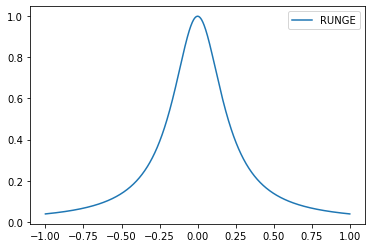

In [139]:
runge_nodes = np.linspace(-1.0, 1.0, 10)
def runge(x):
    return 1/(1+25*(x**2))
runge_values = runge(runge_nodes)
x_axis = np.linspace(-1,1,1000)
g = runge(x_axis)
plt.plot(x_axis,g)
plt.legend(['RUNGE'])
plt.show()

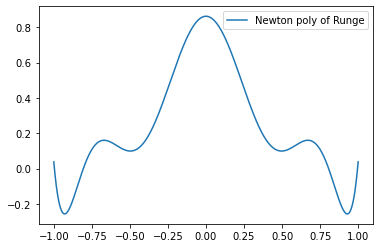

In [141]:
f = newton_poly(runge_nodes,runge_values,x_axis)
plt.plot(x_axis,f)
plt.legend(['Newton poly of Runge'])
plt.show()

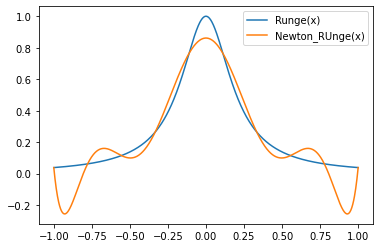

In [143]:
plt.plot(x_axis,g,x_axis,f)
plt.legend(['Runge(x)', 'Newton_RUnge(x)'])
plt.show()

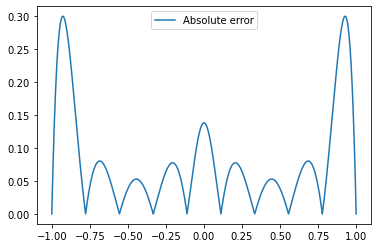

In [155]:
def abs_err(x):
    return abs(runge(x) - newton_poly(runge_nodes,runge_values,x))
plt.plot(x_axis,abs_err(x_axis))
plt.legend(['Absolute error'])
plt.show()

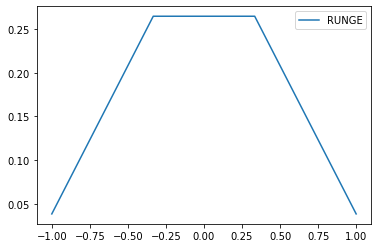

In [159]:
# for 4 nodes
x_axis = np.linspace(-1,1,4)
g = runge(x_axis)
plt.plot(x_axis,g)
plt.legend(['RUNGE'])
plt.show()

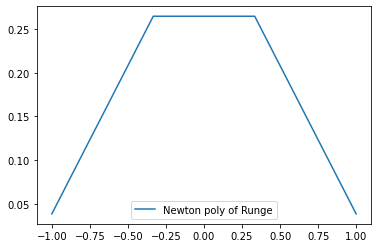

In [161]:
f = newton_poly(runge_nodes,runge_values,x_axis)
plt.plot(x_axis,f)
plt.legend(['Newton poly of Runge'])
plt.show()

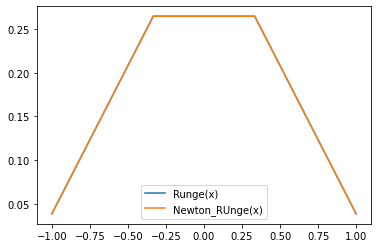

In [163]:
plt.plot(x_axis,g,x_axis,f)
plt.legend(['Runge(x)', 'Newton_RUnge(x)'])
plt.show()

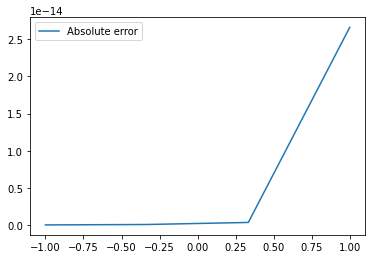

In [165]:
def abs_err(x):
    return abs(runge(x) - newton_poly(runge_nodes,runge_values,x))
plt.plot(x_axis,abs_err(x_axis))
plt.legend(['Absolute error'])
plt.show()

### Задача 5

Известно е (вж. лекции), че най-добрите възли за интерполация в интервала $[-1,1]$ са т.нар. Чебишови възли, които се задават по формулата:

$\xi_k = \cos \left( \dfrac{2k-1}{2n} \pi \right), k=1,\dots,n$


Да се построи интерполационен полином от 10-та степен за функцията на Рунге, като за целта се използват съответните Чебишови възли в интервала $[-1,1]$. Да се построи графика на абсолютната грешка.

In [ ]:
# -.-

### Задача 6

Проведени са експерименти за определяне бързодействието на един алгоритъм за сортиране в зависимост от броя входни елементи. Резултатите са представени в следната таблица:


| Брой елементи (x1000) | 10 | 20 | 50 | 100 | 150 | 200 | 250 |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Време (сек.) | 0.163928 | 0.53282 | 3.00007 | 11.2078 | 26.7487 | 47.3297 | 76.8061 |

Да се определи приблизително колко елемента могат да се сортират за 30 сек.

In [187]:
time_values = np.array([0.163928, 0.53282, 3.00007, 11.2078, 26.7487, 47.3297, 76.8061])
time_nodes = np.array([10.0, 20, 50, 100, 150, 200, 250])
current = 150
for i in range(151,201):
    if(newton_poly(time_nodes,time_values,i) < 30 and newton_poly(time_nodes,time_values,i+1)> 30):
        current = i
print(current) # passed 158 or 159 idk

158
